## DSC550
##### week2 assignment, Author Xin Tang  1/20/24

### About the dataset:
-----------------------
###### This adult income dataset originates from the 1994 Census Bureau database with information of adult (human being aged >16) income.
###### The dataset has 12 columns and  31947 rows (observations).
###### The income is categorized into 2 gourps ( >50K or <=50K )

### Questions to be answered: 
----------------------------------
###### I am interested to know the distribution of the contributing factors, also which factor impact the income levels. 
###### I will try to do some preliminary analysis through data visulization

In [17]:
# Load the dataset as panda frame and import packages.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult income.csv')

In [4]:
#2.1 exam the data
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [5]:
#2.2 exam column and NA
print('variables with NA values', df.isna().sum())

variables with NA values age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64


In [14]:
#3. replace '?' with 'unknown' in work class, rename column names which has dot in them
df['workclass'].replace('?', 'unknown', inplace=True)
df.rename(columns = {'education.num':'education_len'}, inplace = True) 
df.rename(columns = {'marital.status':'marital_status'}, inplace = True) 

In [15]:
df.loc[10:20]

,age,workclass,fnlwgt,education,education_len,marital_status,occupation,relationship,race,sex,native.country,income
10,17,unknown,304873,10th,6,Never-married,?,Own-child,White,Female,United-States,<=50K
11,17,Private,175024,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,United-States,<=50K
12,17,Private,191260,9th,5,Never-married,Other-service,Own-child,White,Male,United-States,<=50K
13,17,unknown,333100,10th,6,Never-married,?,Own-child,White,Male,United-States,<=50K
14,17,Private,103851,11th,7,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
15,17,Private,130125,10th,6,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,United-States,<=50K
16,17,Private,56536,11th,7,Never-married,Sales,Own-child,White,Female,India,<=50K
17,17,Private,191260,11th,7,Never-married,Other-service,Own-child,White,Male,United-States,<=50K
18,17,Private,232713,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,United-States,<=50K
19,17,Private,106733,11th,7,Never-married,Craft-repair,Own-child,White,Male,United-States,<=50K


###### start visualization

Text(0, 0.5, 'final weight')

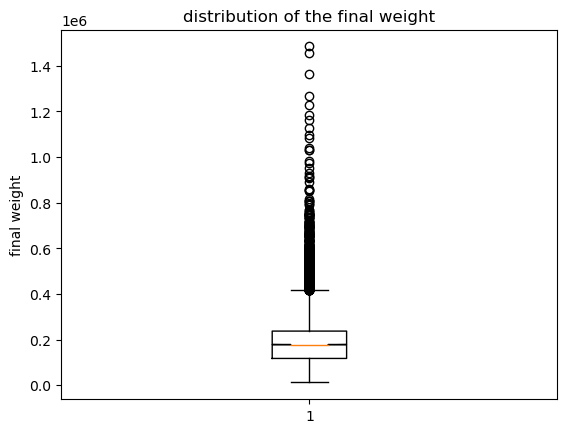

In [23]:
# box chart of fnlwight (final weight)
plt.boxplot(df.fnlwgt, notch=True)
plt.title('distribution of the final weight')
plt.ylabel('final weight')

###### most weight is concentrated on low side (between 1800 and  380000), this may not explain too much for my question on income.

Text(0.5, 1.0, 'Race distribution')

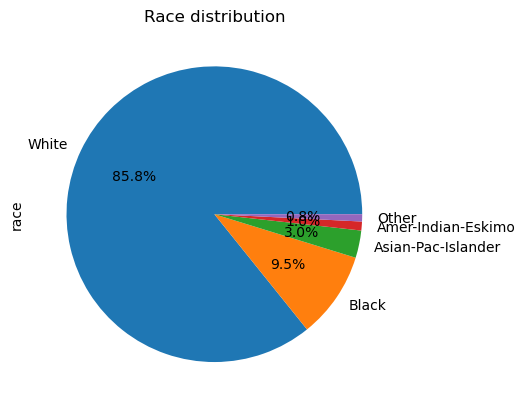

In [10]:
# pie chart of the race
data =df.race.value_counts()

data.plot(kind='pie', autopct='%0.1f%%')
plt.title('Race distribution')

###### from the pie chart, it is clear that the sampling among races are imbalanced. Even white is dominating race in real life, 86% is still much higher than realistic distribution (per census, 73.6% of us population are white in 1995), so maybe this need to be considered for future analysis and modeling. 

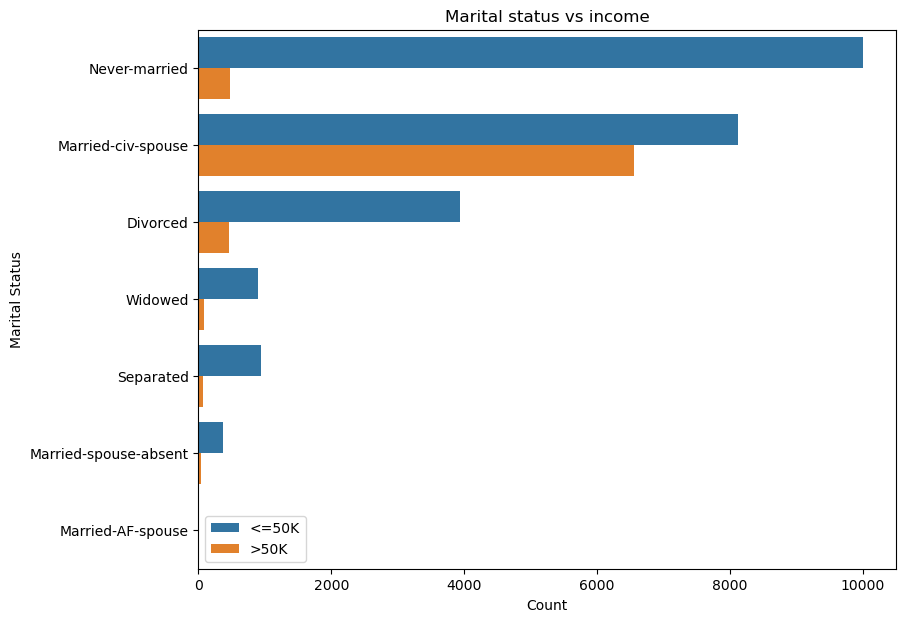

In [21]:
# distribution chart between marital status vs income
plt.figure(figsize=(9,7))
sns.countplot(data=df, y='marital.status', hue='income')

plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Marital status vs income')

# Add legend
plt.legend()

# Show the plot
plt.show()

'''
from above chart, the never married group is the largest group to report earning income, however, the married-civ-spouse group has count of people reporting earning high income
'''

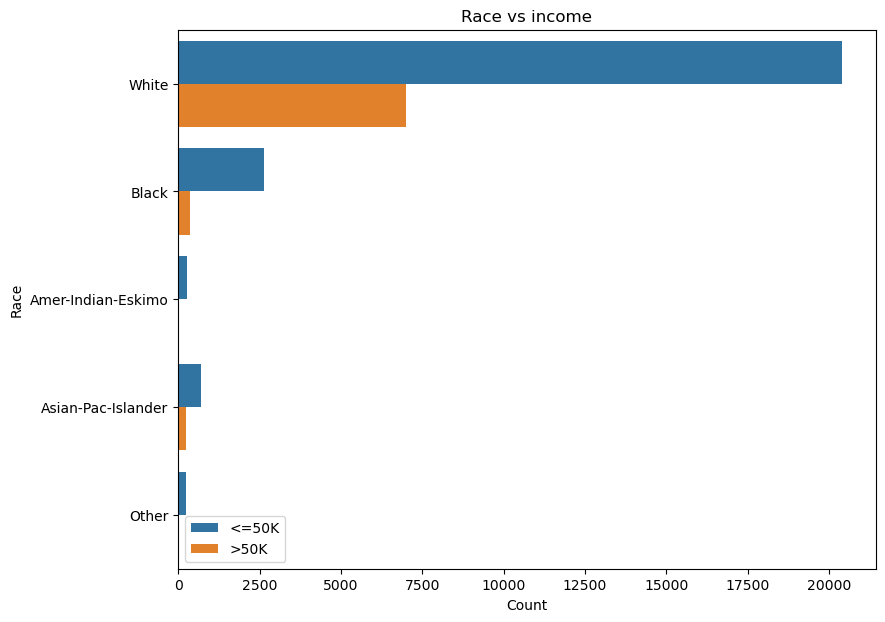

In [22]:
# Check income level among race
plt.figure(figsize=(9,7))
sns.countplot(data=df, y='race', hue='income')

plt.xlabel('Count')
plt.ylabel('Race')
plt.title('Race vs income')

# Add legend
plt.legend()

# Show the plot
plt.show()

'''
 from chart above, white has most people reporting income, this may due to the sampling imbalance, However,  high income people count is also significant high. 
'''

##### Conculsion:
from the chart above, looks like most often white race earn higher income than any other races. Among the white, the **married couple** have most chance to have high income (> 50K dollars). further exam is need to check if this is due to imbalance of the race sampling, or it is true white just earn more. 

In [24]:
# End of exercise